In [1]:
import requests

url_get = requests.get('https://monexnews.com/kurs-valuta-asing.htm?kurs=JPY&searchdatefrom=01-01-2019&searchdateto=31-12-2019')

In [2]:
url_get.content

b'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml">\n<head>\n<meta http-equiv="Content-Language" content="en,in" />\n<link rel="alternate" href="https://monexnews.com/kurs-valuta-asing.php" hreflang="en-ID" />\n<base href="https://monexnews.com/" target="_self" />\n<title>Kurs Yen Jepang | JPY | Harga Nilai Tukar Yen Hari Ini | Monexnews</title>\n<meta name="description" content="Kurs yen jepang JPY, nilai tukar rupiah terhadap harga yen hari ini berdasar kurs tengah BI, Bank Indonesia. " />\n<meta name="keywords" content="Kurs yen, jpy, nilai tukar yen, monexnews" />\n<meta property="og:image" content="favicon.jpg" />\n<meta name="author" content="Ultimaengine.com" />\n<meta name="robots" content="follow, index" />\n<meta name="revisit-after" content="7 days" />\n<meta name="viewport" content="width=device-width, initial-scale=1.0" />\n<meta name="google-site-verificati

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [4]:
print(soup.prettify())

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <meta content="en,in" http-equiv="Content-Language"/>
  <link href="https://monexnews.com/kurs-valuta-asing.php" hreflang="en-ID" rel="alternate"/>
  <base href="https://monexnews.com/" target="_self"/>
  <title>
   Kurs Yen Jepang | JPY | Harga Nilai Tukar Yen Hari Ini | Monexnews
  </title>
  <meta content="Kurs yen jepang JPY, nilai tukar rupiah terhadap harga yen hari ini berdasar kurs tengah BI, Bank Indonesia. " name="description"/>
  <meta content="Kurs yen, jpy, nilai tukar yen, monexnews" name="keywords"/>
  <meta content="favicon.jpg" property="og:image"/>
  <meta content="Ultimaengine.com" name="author"/>
  <meta content="follow, index" name="robots"/>
  <meta content="7 days" name="revisit-after"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta content="M7NOlgqcEadhl

In [5]:
table = soup.find('table', attrs={'class':'table'})
print(table.prettify()[1:500])

table class="table">
 <tr>
  <td>
   TANGGAL
  </td>
  <td>
   ASK
  </td>
  <td>
   BID
  </td>
 </tr>
 <tr class="verySoftGreyBg">
  <td>
   31 Desember 2019
  </td>
  <td>
   128,62
  </td>
  <td>
   127,32
  </td>
 </tr>
 <tr>
  <td>
   30 Desember 2019
  </td>
  <td>
   128,30
  </td>
  <td>
   127,02
  </td>
 </tr>
 <tr class="verySoftGreyBg">
  <td>
   27 Desember 2019
  </td>
  <td>
   128,11
  </td>
  <td>
   126,83
  </td>
 </tr>
 <tr>
  <td>
   26 Desember 2019
  </td>
  <td>
   128,


In [6]:
TotalLines = table.find_all("tr")
print(len(TotalLines))

247


In [7]:
temp = []

for i in range(1, len(TotalLines)):
    row = table.find_all('tr')[i]
    
    period = row.find_all('td')[0].text.replace(u'\xa0', ' ')
    period = period.strip()
    
    ask = row.find_all('td')[1].text
    ask = ask.strip()
    
    bid = row.find_all('td')[1].text
    bid = bid.strip()    
    
    temp.append((period,ask,bid)) 
    
temp

[('31 Desember 2019', '128,62', '128,62'),
 ('30 Desember 2019', '128,30', '128,30'),
 ('27 Desember 2019', '128,11', '128,11'),
 ('26 Desember 2019', '128,27', '128,27'),
 ('23 Desember 2019', '128,39', '128,39'),
 ('20 Desember 2019', '128,63', '128,63'),
 ('19 Desember 2019', '128,24', '128,24'),
 ('18 Desember 2019', '128,64', '128,64'),
 ('17 Desember 2019', '128,62', '128,62'),
 ('16 Desember 2019', '128,67', '128,67'),
 ('13 Desember 2019', '128,30', '128,30'),
 ('12 Desember 2019', '130,04', '130,04'),
 ('11 Desember 2019', '129,65', '129,65'),
 ('10 Desember 2019', '129,56', '129,56'),
 ('09 Desember 2019', '129,76', '129,76'),
 ('06 Desember 2019', '129,78', '129,78'),
 ('05 Desember 2019', '130,10', '130,10'),
 ('04 Desember 2019', '130,79', '130,79'),
 ('03 Desember 2019', '130,15', '130,15'),
 ('02 Desember 2019', '129,36', '129,36'),
 ('29 November 2019', '129,44', '129,44'),
 ('28 November 2019', '129,47', '129,47'),
 ('27 November 2019', '129,84', '129,84'),
 ('26 Novem

In [8]:
temp = temp[::-1]
temp

[('02 Januari 2019', '132,89', '132,89'),
 ('03 Januari 2019', '135,44', '135,44'),
 ('04 Januari 2019', '133,51', '133,51'),
 ('07 Januari 2019', '130,86', '130,86'),
 ('08 Januari 2019', '129,84', '129,84'),
 ('09 Januari 2019', '130,31', '130,31'),
 ('10 Januari 2019', '131,22', '131,22'),
 ('11 Januari 2019', '130,62', '130,62'),
 ('14 Januari 2019', '130,52', '130,52'),
 ('15 Januari 2019', '130,56', '130,56'),
 ('16 Januari 2019', '131,11', '131,11'),
 ('17 Januari 2019', '130,61', '130,61'),
 ('18 Januari 2019', '130,37', '130,37'),
 ('21 Januari 2019', '130,31', '130,31'),
 ('22 Januari 2019', '130,39', '130,39'),
 ('23 Januari 2019', '130,05', '130,05'),
 ('24 Januari 2019', '129,79', '129,79'),
 ('25 Januari 2019', '129,68', '129,68'),
 ('28 Januari 2019', '128,97', '128,97'),
 ('29 Januari 2019', '129,74', '129,74'),
 ('30 Januari 2019', '129,79', '129,79'),
 ('31 Januari 2019', '129,92', '129,92'),
 ('01 Februari 2019', '129,05', '129,05'),
 ('04 Februari 2019', '128,24', '

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.3f' % x)

jpy = pd.DataFrame(temp, columns = ('Date','Ask','Bid'))
jpy.iloc[130:240]

,Date,Ask,Bid
130,19 Juli 2019,"130,04","130,04"
131,22 Juli 2019,"129,98","129,98"
132,23 Juli 2019,"130,00","130,00"
133,24 Juli 2019,"130,15","130,15"
134,25 Juli 2019,"129,98","129,98"
...,...,...,...
235,13 Desember 2019,"128,30","128,30"
236,16 Desember 2019,"128,67","128,67"
237,17 Desember 2019,"128,62","128,62"
238,18 Desember 2019,"128,64","128,64"


In [10]:
jpy.dtypes

Date    object
Ask     object
Bid     object
dtype: object

In [11]:
jpy[['Ask','Bid']] = jpy[['Ask','Bid']].replace(",",".", regex=True)
jpy[['Ask','Bid']] = jpy[['Ask','Bid']].replace(" %","")
jpy[['Ask','Bid']] = jpy[['Ask','Bid']].astype('float64')

In [12]:
jpy['Date'] = jpy['Date'].apply(lambda x: x.replace('Januari', 'January'))
jpy['Date'] = jpy['Date'].apply(lambda x: x.replace('Februari', 'February'))
jpy['Date'] = jpy['Date'].apply(lambda x: x.replace('Maret', 'March'))
jpy['Date'] = jpy['Date'].apply(lambda x: x.replace('April', 'April'))
jpy['Date'] = jpy['Date'].apply(lambda x: x.replace('Mei', 'May'))
jpy['Date'] = jpy['Date'].apply(lambda x: x.replace('Juni', 'June'))
jpy['Date'] = jpy['Date'].apply(lambda x: x.replace('Juli', 'July'))
jpy['Date'] = jpy['Date'].apply(lambda x: x.replace('Agustus', 'August'))
jpy['Date'] = jpy['Date'].apply(lambda x: x.replace('September', 'September'))
jpy['Date'] = jpy['Date'].apply(lambda x: x.replace('Oktober', 'October'))
jpy['Date'] = jpy['Date'].apply(lambda x: x.replace('November', 'November'))
jpy['Date'] = jpy['Date'].apply(lambda x: x.replace('Desember', 'December'))
jpy['Date'] = pd.to_datetime(jpy['Date'])
jpy.tail()

,Date,Ask,Bid
241,2019-12-23,128.390,128.390
242,2019-12-26,128.270,128.270
243,2019-12-27,128.110,128.110
244,2019-12-30,128.300,128.300
245,2019-12-31,128.620,128.620


In [13]:
print(len(jpy))
print(jpy.dtypes)

246
Date    datetime64[ns]
Ask            float64
Bid            float64
dtype: object


In [14]:
jpy['Month'] = jpy['Date'].dt.month_name()
jpy.head()

,Date,Ask,Bid,Month
0,2019-01-02,132.890,132.890,January
1,2019-01-03,135.440,135.440,January
2,2019-01-04,133.510,133.510,January
3,2019-01-07,130.860,130.860,January
4,2019-01-08,129.840,129.840,January


In [15]:
jpy_month = pd.crosstab(
    index= jpy.Month,
    columns = 'average',
    values= jpy[['Ask','Bid']],
    aggfunc= 'mean'
)
jpy_month

ValueError: Wrong number of items passed 2, placement implies 1

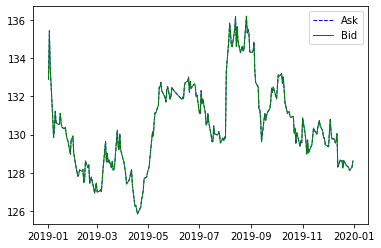

In [156]:
plt.plot( 'Date', 'Ask', data=jpy, color='blue', linewidth=1, linestyle='dashed')
plt.plot( 'Date', 'Bid', data=jpy, color='green', linewidth=1)
plt.legend()